<a href="https://colab.research.google.com/github/Luiskar1/Luiskar1/blob/main/DesicionTree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargar todas las librerías
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt




In [ ]:
#Cargar la base de datos Dataframe =df
df=pd.read_excel("/content/drive/MyDrive/Analíticas de Aprendizaje/Datos_Est.xlsx")

In [ ]:
#Muestra del Dataframe
df.head(12)

,Estudiante,Nota,Genero,Edad,Procedencia,Aprobo
0,1,3.0,M,10.0,Rural,A
1,2,4.0,M,11.0,Urbano,A
2,3,5.0,M,12.0,Rural,A
3,4,3.5,M,13.0,Rural,A
4,5,4.0,F,15.0,Rural,A
5,6,5.0,F,14.0,Rural,A
6,7,4.0,F,10.0,Rural,A
7,8,3.5,M,10.0,Rural,A
8,9,4.0,F,11.0,Rural,A
9,10,5.0,M,12.0,Rural,A


In [ ]:
#Mostrar cuantas filas y columnas tiene el Dataframe
print(df.shape)

(251, 6)


In [ ]:
#Mostrar información de los atributos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estudiante   251 non-null    int64  
 1   Nota         247 non-null    float64
 2   Genero       250 non-null    object 
 3   Edad         249 non-null    float64
 4   Procedencia  249 non-null    object 
 5   Aprobo       247 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 11.9+ KB
None


In [ ]:
#Convertir las variables tipo cadena/objeto a categóricas
df[["Genero","Procedencia","Aprobo"]]=df[["Genero","Procedencia","Aprobo"]].astype("category")
print(df.info())
df[["Estudiante"]]=df[["Estudiante"]].astype("object")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Estudiante   251 non-null    int64   
 1   Nota         247 non-null    float64 
 2   Genero       250 non-null    category
 3   Edad         249 non-null    float64 
 4   Procedencia  249 non-null    category
 5   Aprobo       247 non-null    category
dtypes: category(3), float64(2), int64(1)
memory usage: 7.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Estudiante   251 non-null    object  
 1   Nota         247 non-null    float64 
 2   Genero       250 non-null    category
 3   Edad         249 non-null    float64 
 4   Procedencia  249 non-null    category
 5   Aprobo       247 non-null    category
dtypes: category(3), float64(2), obj

In [ ]:
#Mostrar si hay datos perdidos o faltantes NAN
col=df.columns
print(df.columns. tolist ())
for i in col:
    print(i,"-",df[i].isna().sum())

['Estudiante', 'Nota', 'Genero', 'Edad', 'Procedencia', 'Aprobo']
Estudiante - 0
Nota - 4
Genero - 1
Edad - 2
Procedencia - 2
Aprobo - 4


In [ ]:
#Imputación de valores perdidos o faltantes NaN
# Imputamos la variable Nota con la Media
df['Nota'].fillna(df['Nota'].mean(), inplace=True)
print("valores perdidos Nota: " + 
      str(df['Nota'].isnull().sum()))

# Imputamos las variables Genero, Edad, Procedencia y Aprobo con la moda por ser dato categóricos
df['Genero'].fillna(df['Genero'].mode()[0], inplace=True)
print("Valores perdidos Genero: " + 
      str(df['Genero'].isnull().sum()))
df['Edad'].fillna(df['Edad'].mode()[0], inplace=True)
print("Valores perdidos Edad: " + 
      str(df['Edad'].isnull().sum()))
df['Procedencia'].fillna(df['Procedencia'].mode()[0], inplace=True)
print("Valores perdidos Procedencia: " + 
      str(df['Procedencia'].isnull().sum()))
df['Aprobo'].fillna(df['Aprobo'].mode()[0], inplace=True)
print("Valores perdidos Aprobo: " + 
      str(df['Aprobo'].isnull().sum()))

valores perdidos Nota: 0
Valores perdidos Genero: 0
Valores perdidos Edad: 0
Valores perdidos Procedencia: 0
Valores perdidos Aprobo: 0


In [ ]:
#Realizar algunos Descriptivos con la liberia stast y el módulo Scypi
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#Definir las variables en el nuevo Dataframe
VariablesTexto=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesTexto)
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['Genero', 'Procedencia', 'Aprobo']
['Nota', 'Edad']


In [ ]:
#Mostrar datos
Nota=df.Nota
Gen=df.Genero
Proc=df.Procedencia
A_R=df.Aprobo
Ed=df.Edad

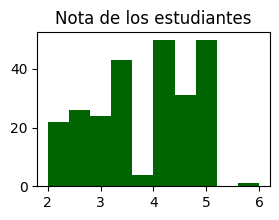

In [ ]:
#Plots sencillos con plt
plt.figure(figsize=(3,2))
plt.hist(Nota,facecolor="#006400")
plt.title("Nota de los estudiantes")
plt.show()

In [ ]:
Promedio=np.mean(Nota)
print(Promedio)

3.7526315789473688


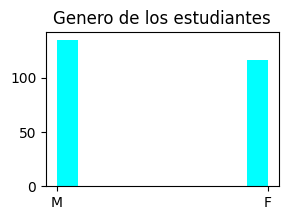

In [ ]:
plt.figure(figsize=(3,2))
plt.hist(Gen,facecolor="#00FFFF")
plt.title("Genero de los estudiantes")
plt.show()

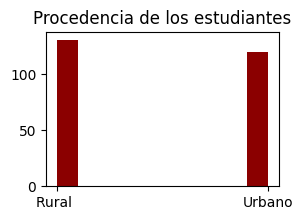

In [ ]:
plt.figure(figsize=(3,2))
plt.hist(Proc,facecolor="darkred")
plt.title("Procedencia de los estudiantes")
plt.show()

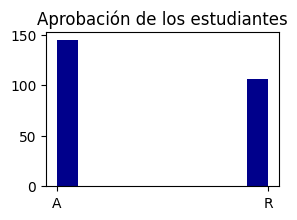

In [ ]:
plt.figure(figsize=(3,2))
plt.hist(A_R,facecolor="#00008B")
plt.title("Aprobación de los estudiantes")
plt.show()

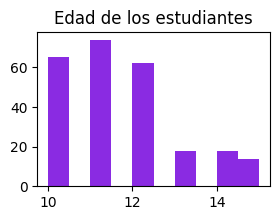

In [ ]:
plt.figure(figsize=(3,2))
plt.hist(Ed,facecolor="#8A2BE2")
plt.title("Edad de los estudiantes")
plt.show()

In [ ]:
#Estadísticos Variables continuas
df.describe()

,Nota,Edad
count,251.000000,251.000000
mean,3.752632,11.569721
std,0.954978,1.419197
min,2.000000,10.000000
25%,3.000000,10.000000
50%,4.000000,11.000000
75%,4.500000,12.000000
max,6.000000,15.000000


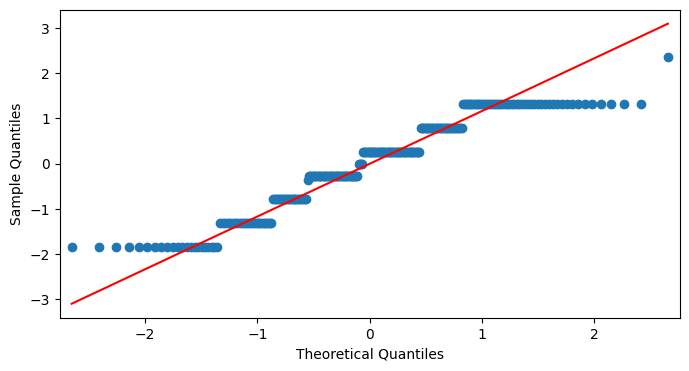

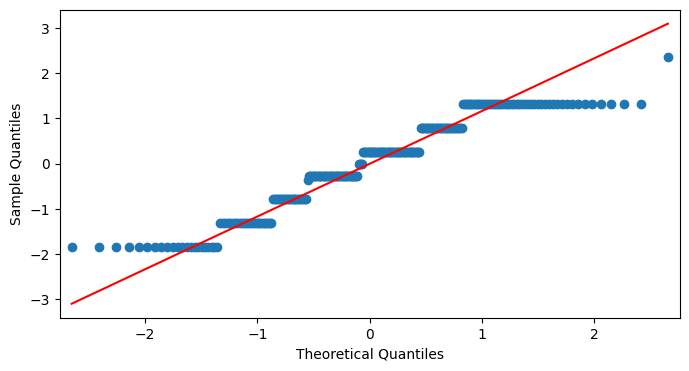

In [ ]:
#Graficos dispersón de la variable dependiente o respuesta
fig, ax=plt.subplots(figsize=(8,4))
sm.qqplot(Nota,fit=True,line="q",ax=ax)

In [ ]:
#Prueba de Normalidad
k2,pvalue2=stats.normaltest(Nota)
pvalue2

2.048175746479811e-07

In [ ]:
#Modelos de Árboles de clasificación
#Se define el Dataframe
def TablaX(df,VariablesNumericas,VariablesCategoricas):
  datos=df

  if VariablesCategoricas != [] :
    datos_dummies=pd.get_dummies(datos[VariablesCategoricas],drop_first=True)
    X=pd.concat([datos_dummies,datos[VariablesNumericas]],axis=1,sort=False)
  else:
    X=datos[VariablesNumericas].apply
  return X

In [ ]:
#De las variables categóricas se extrae la variable respuesta o dependiente o de estudio en este caso "Aprobo"
VariablesCategoricas=df.drop(["Aprobo"],axis=1).select_dtypes(include=["category"]).columns.to_list()
VariablesCategoricas

['Genero', 'Procedencia']

In [ ]:
#De las variables categóricas se extrae la variable respuesta o dependiente o de estudio en este caso "Aprobo"
VariablesNumericas=df.drop(["Estudiante"],axis=1).select_dtypes(include=["int64"]).columns.to_list()
VariablesNumericas

[]

In [ ]:
#Vuelvo a observar las variables numéricas para comprobar
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['Nota', 'Edad']


In [ ]:
#Defino la variable respuesta
Y=df.Aprobo

In [ ]:
#Imprimo la nueva tabla de variables dummies que crea Phyton
X=TablaX(df,VariablesNumericas,VariablesCategoricas)
X

,Genero_M,Procedencia_Urbano,Nota,Edad
0,1,0,3.0,10.0
1,1,1,4.0,11.0
2,1,0,5.0,12.0
3,1,0,3.5,13.0
4,0,0,4.0,15.0
...,...,...,...,...
246,1,1,3.0,11.0
247,0,1,2.5,11.0
248,0,0,2.5,11.0
249,0,0,2.5,11.0


In [ ]:
#Divido el conjunto de datos en entrenamineto (Train) y el de evaluación (test)
#División del cojunto de datos
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4)
(51, 4)
(200,)
(51,)


In [ ]:
#Creo el primer modelo de árbol
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
#Observo los parámetros del modelo
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
#Importar las librerías para el Modelo
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import tree
# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV


In [ ]:
#Llamar e implementar el modelo
Modelo_AD= DecisionTreeClassifier(criterion="gini",random_state=123)
Modelo_AD.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
#Ahora observo que no falten columnas en las variables independientes de los datos del entrenamiento
X_train.columns

Index(['Genero_M', 'Procedencia_Urbano', 'Nota', 'Edad'], dtype='object')

In [ ]:
#Miro el orden del Modelo
Orden= tree.export_text(Modelo_AD)
print(Orden)

|--- feature_3 <= 13.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_3 <= 10.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_2 <= 2.25
|   |   |   |   |   |--- class: R
|   |   |   |   |--- feature_2 >  2.25
|   |   |   |   |   |--- feature_2 <= 4.25
|   |   |   |   |   |   |--- feature_2 <= 2.75
|   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |   |--- feature_2 >  2.75
|   |   |   |   |   |   |   |--- feature_2 <= 3.25
|   |   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |   |   |--- feature_2 >  3.25
|   |   |   |   |   |   |   |   |--- feature_2 <= 3.75
|   |   |   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |   |   |   |--- feature_2 >  3.75
|   |   |   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |--- feature_2 >  4.25
|   |   |   |   |   |   |--- feature_2 <= 4.75
|   |   |   |   |   |   |   |--- class: R
|   |   |   |   |   |   |--- feature_2 >  4.75
|   |   |   |   |   |   |   |--- class: A
|   |   |   

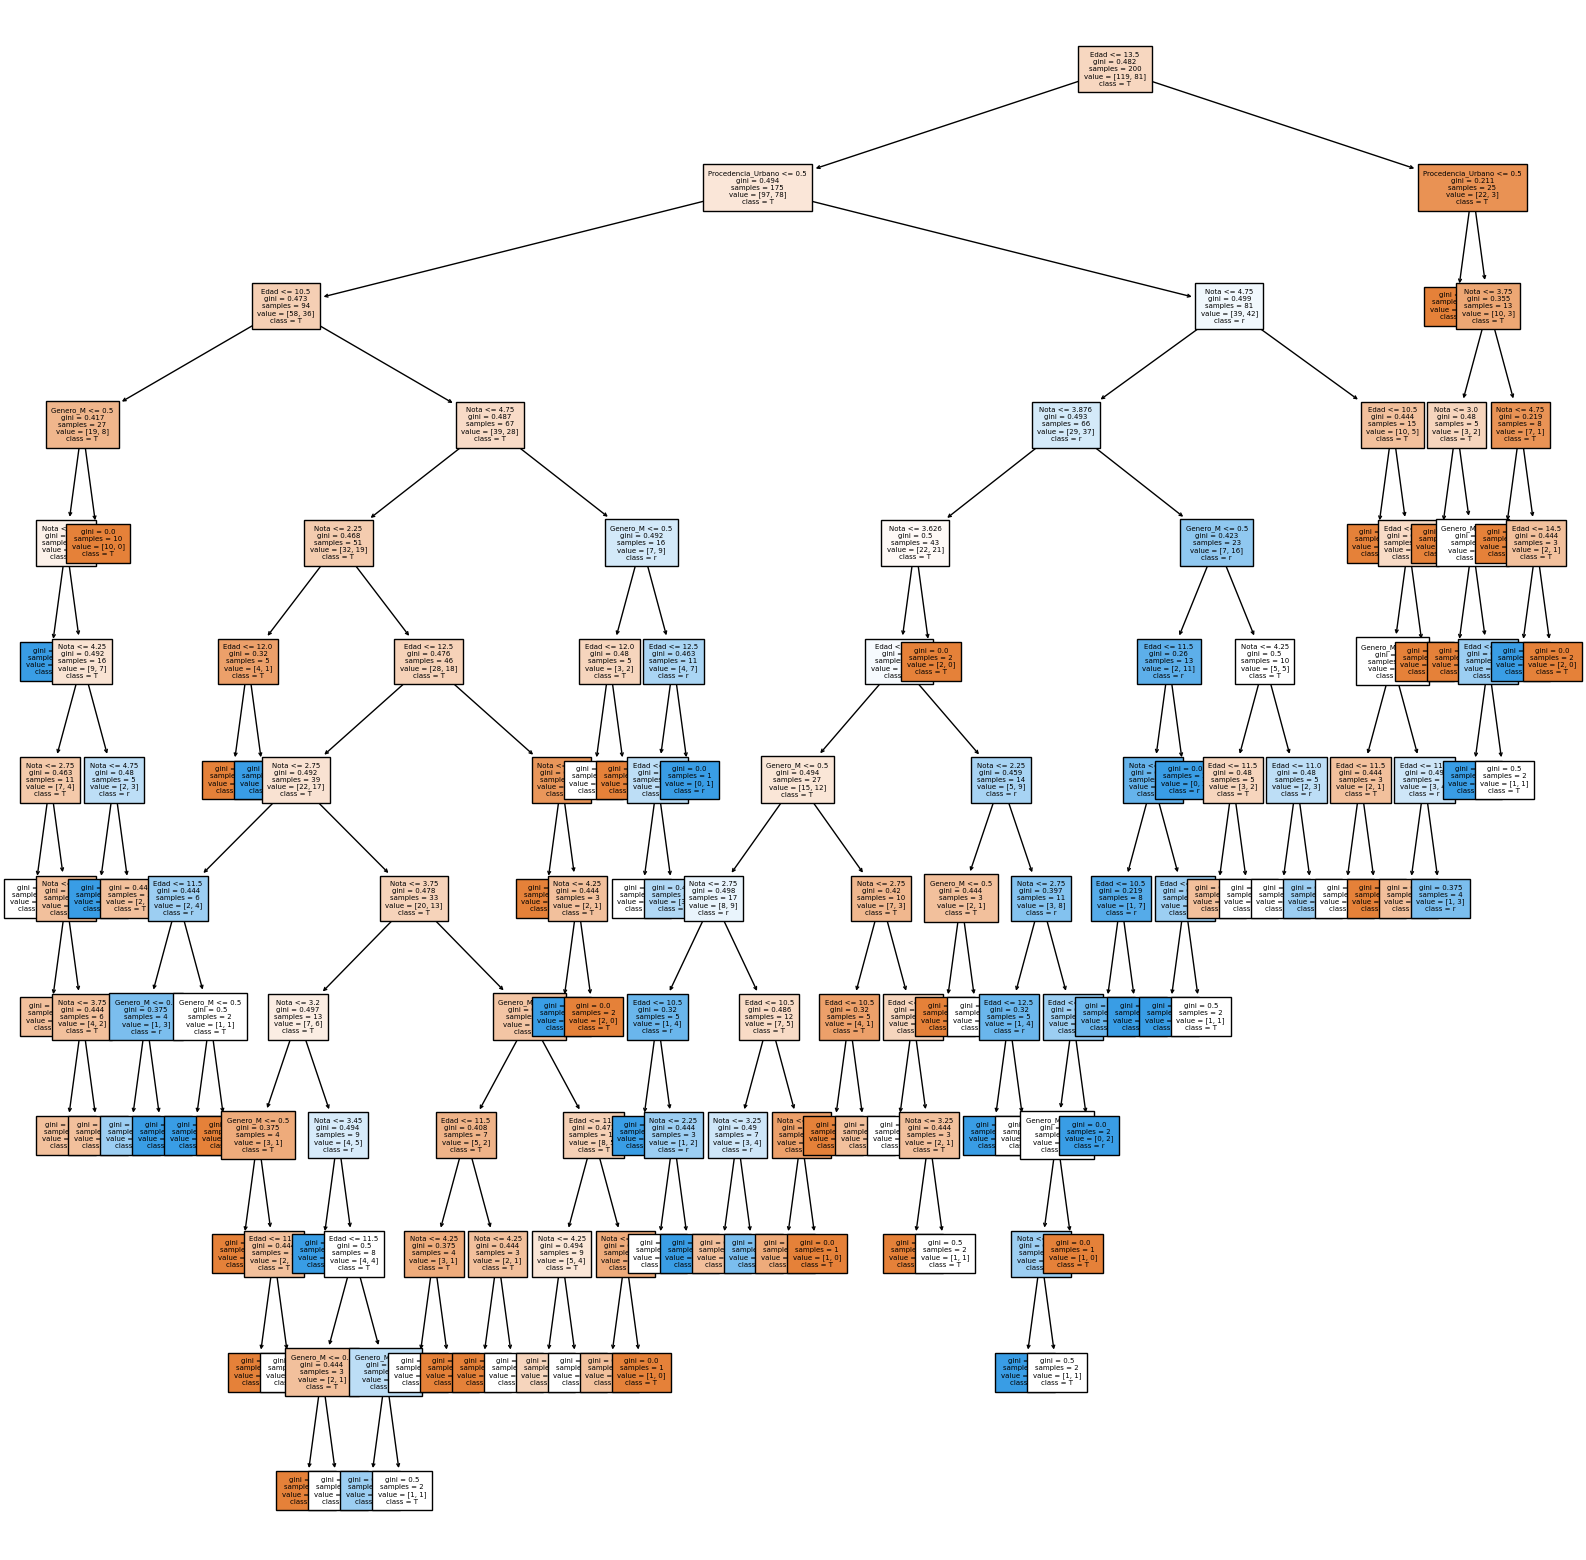

In [ ]:
#Esquema gráfico del Árbol
fig, ax = plt.subplots(figsize=(20, 20))
plot=plot_tree(decision_tree=Modelo_AD,
              feature_names=X_train.columns,
                filled        = True,
               fontsize      = 5,
              class_names="Trazado",
                ax            = ax
              )

In [ ]:
#Conocer las variables predictoras con mayor peso en el árbol
Importancia_Predictores=pd.DataFrame(
{"predictor":X_train.columns,
 "Importancia":Modelo_AD.feature_importances_})

Importancia_Predictores=Importancia_Predictores.sort_values("Importancia",ascending=False)
Importancia_Predictores=Importancia_Predictores.reset_index(drop=True)
Importancia_Predictores

,predictor,Importancia
0,Edad,0.389218
1,Nota,0.368468
2,Genero_M,0.193262
3,Procedencia_Urbano,0.049051


In [ ]:
#Test de Exactitud - Accuracy
Predicciones_Train_AD=Modelo_AD.predict(X=X_train)
Accuracy_Train_AD=metrics.accuracy_score(y_train,Predicciones_Train_AD)
print(Accuracy_Train_AD)

0.785


In [ ]:
#Reporte de las métricas del conjunto de entrenamiento
Reporte_Train_AD=metrics.classification_report(y_train,Predicciones_Train_AD)
print(Reporte_Train_AD)

              precision    recall  f1-score   support

           A       0.76      0.92      0.84       119
           R       0.84      0.58      0.69        81

    accuracy                           0.79       200
   macro avg       0.80      0.75      0.76       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
#Para realizar los mapas de calor se importa la libreria seaborn
import seaborn as sns


<ipython-input-39-e607ebbca7c0>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  confusion_matrix_Normalizada=confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]


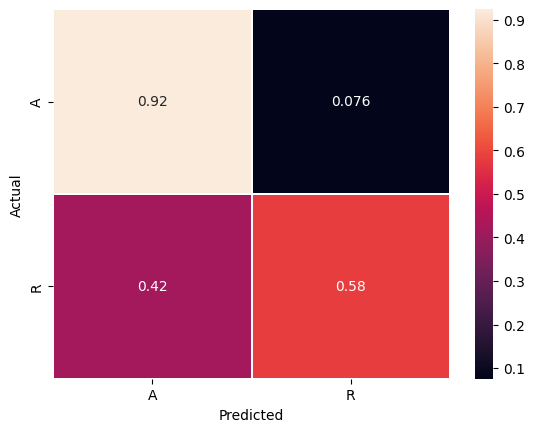

In [ ]:
data1 = {"y_Actual":y_train,
        "y_Predicted": Modelo_AD.predict(X_train)
        }
df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix1 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_Normalizada=confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01)
plt.show()

In [ ]:
#Reporte de las métricas del conjunto de testeo
Predicciones_Test_AD=Modelo_AD.predict(X=X_test)
Accuracy_Test_AD=metrics.accuracy_score(y_test,Predicciones_Test_AD)
print(Accuracy_Test_AD)

0.49019607843137253


In [ ]:
Reporte_Test_AD=metrics.classification_report(y_test,Predicciones_Test_AD)
print(Reporte_Test_AD)

              precision    recall  f1-score   support

           A       0.50      0.65      0.57        26
           R       0.47      0.32      0.38        25

    accuracy                           0.49        51
   macro avg       0.49      0.49      0.47        51
weighted avg       0.49      0.49      0.48        51



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

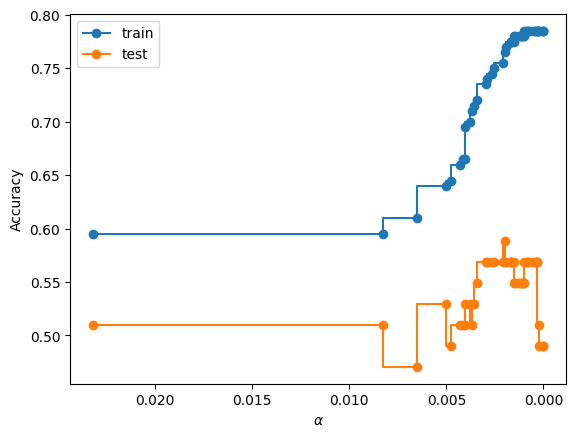

In [ ]:
f=Modelo_AD
f.get_n_leaves()
f.get_depth()

f_alpha = f.cost_complexity_pruning_path(X_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']

fs = []
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(X_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)
train_scores = [f.score(X_train, y_train) for f in fs]
test_scores  = [f.score(X_test, y_test)   for f in fs]
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

In [ ]:
#Poda o simplificación del Árbol
#Importar las librerías
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
#LLamamos el nuevo modelo con la función DecisionTreeClassifier
f=DecisionTreeClassifier(random_state=123)
max_depth=range(1,31,3)
min_samples_leaf= range(1,10,1)

param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(X_train, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.595000 using {'max_depth': 1, 'min_samples_leaf': 1}


In [ ]:
#Creación del nuevo modelo
Arbol_Optimo=DecisionTreeClassifier(criterion='gini',
                                             max_depth=4, # Profundidad Optima
                                             ccp_alpha=0.001,
                                             random_state=123)
Arbol_Optimo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=123)

Nodos: 13
Profundidad del árbol: 4
Número de nodos terminales: 13


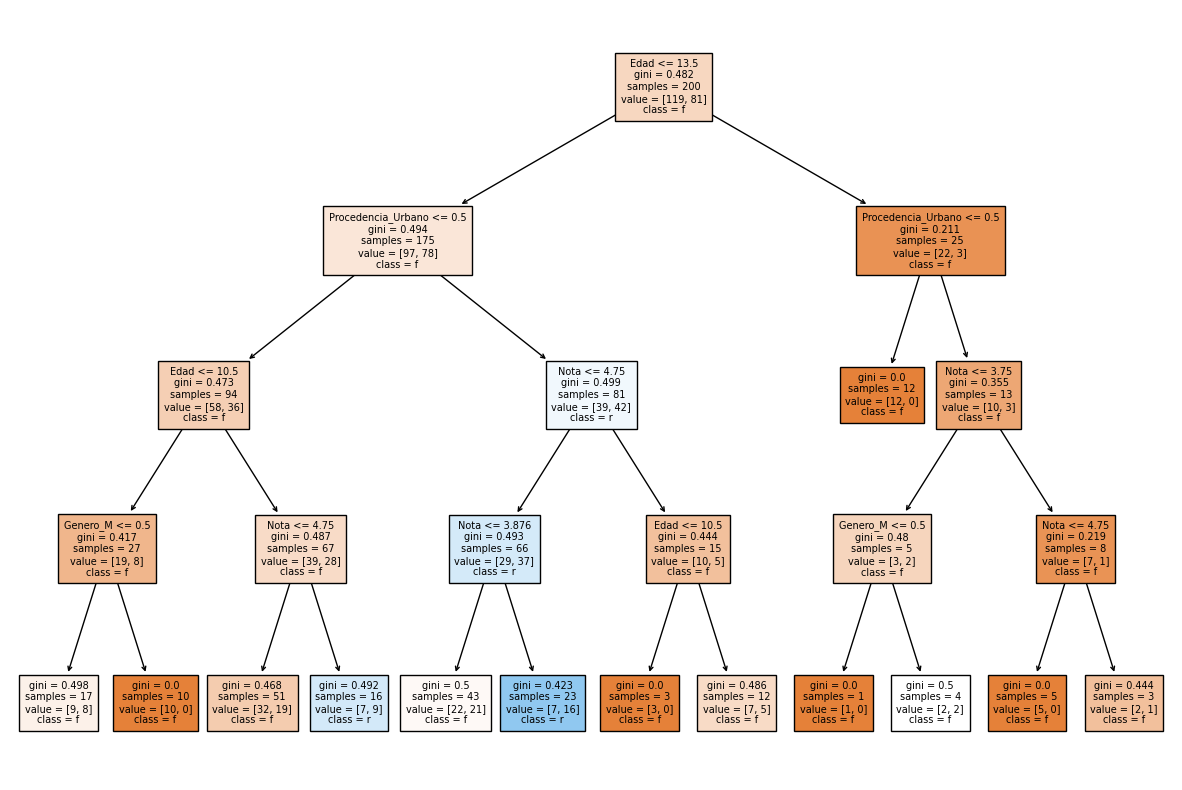

In [ ]:
#Gráfica del ärbol podado
print('Nodos:', Arbol_Optimo.get_n_leaves())
ig, ax = plt.subplots(figsize=(15, 10))
print(f"Profundidad del árbol: {Arbol_Optimo.get_depth()}")
print(f"Número de nodos terminales: {Arbol_Optimo.get_n_leaves()}")
plot=plot_tree(decision_tree=Arbol_Optimo,
              feature_names=X_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

In [ ]:
#Test de Exactitud - Accuracy
Predicciones_Train_AD1=Arbol_Optimo.predict(X=X_train)
Accuracy_Train_AD_Optimo=metrics.accuracy_score(y_train,Predicciones_Train_AD1)
print(Accuracy_Train_AD_Optimo)
#Reporte de las nuevas métricas del conjunto de entrenamiento
Reporte_Trian_AD_Optimo=metrics.classification_report(y_train,Predicciones_Train_AD1)
print(Reporte_Trian_AD_Optimo)

0.65
              precision    recall  f1-score   support

           A       0.65      0.88      0.75       119
           R       0.64      0.31      0.42        81

    accuracy                           0.65       200
   macro avg       0.65      0.60      0.58       200
weighted avg       0.65      0.65      0.61       200



In [ ]:
Predicciones_Test_AD_Optimo=Arbol_Optimo.predict(X=X_test)
Accuracy_Test_AD_Optimo=metrics.accuracy_score(y_test,Predicciones_Test_AD_Optimo)
print(Accuracy_Test_AD_Optimo)
Reporte_Test_AD_Optimo=metrics.classification_report(y_test,Predicciones_Test_AD_Optimo)
print(Reporte_Test_AD_Optimo)

0.5490196078431373
              precision    recall  f1-score   support

           A       0.54      0.85      0.66        26
           R       0.60      0.24      0.34        25

    accuracy                           0.55        51
   macro avg       0.57      0.54      0.50        51
weighted avg       0.57      0.55      0.50        51

